# Risk Adjusted Return Computation

In [1]:
import pandas as pd

Import the Sample price file for the blue and orange asset prices

In [2]:
prices=pd.read_csv("sample_prices.csv")

In [3]:
prices.head(2)

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828


Computing returns on prices data frame using pct_change

In [4]:
returns=prices.pct_change()

In [5]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [6]:
returns=returns.dropna()

This take care of the row 0

In [7]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [8]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

deviations from mean 

Computing Standard deviation by ourselves and checking against the formula

In [9]:
deviation=returns-returns.mean()

In [10]:
sqrdeviation=deviation**2

In [11]:
variance=sqrdeviation.mean()

In [12]:
Stddev=variance**0.5
Stddev

BLUE      0.022957
ORANGE    0.076212
dtype: float64

##### The Difference in system computed measure and the one above is because we took the mean for n observations when we should have taken (n-1). Next we will compute using (n-1)

##### We need to know what is the number of observations and will use the shape funtion for it

In [13]:
returns.shape

(12, 2)

In [14]:
numofobsv=returns.shape[0]
variance=sqrdeviation.sum()/(numofobsv-1)
StdDev=variance**0.5
StdDev

BLUE      0.023977
ORANGE    0.079601
dtype: float64

##### The above now matches with the System computed values

In [15]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

#### Annualized volatility would be multiplying the above with the Square root of the period. This was monthly data so Multiply by Sqr(12)

In [16]:
import numpy as np
StdDev*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Real World Data Analysis. 
#### US stock Return data grouped on Market Capitalisation between 1926 to 2018

Now we will try to do the analysis on real set of data.
A data set that provides us grouped returns on stocks based on market capitalisation
If you see Hi 30 as a column that essentially means the returns on 30% of the sample which had the highest Market Capitalisation
Similiarly lo 30 is the other end of the spectrum in market capitalisation

In [17]:
returns=pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)

The additional arguements after the read command on the file would lead to the first row to act as header,
first column to act as index which is the date field and python would also try to parse the dates for timestamp
Also there are values with -99.99 in the data which would be treated as na values

In [18]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


Now here we are interested on the Lo 10 and Hi 10 columns for doing our analysis. 
So we will trim our data set to only show this two columns. 
Do also notice that the arguement na_values=-99.99 has cleaned the data set to show NA values in the first column

In [19]:
columns= ["Lo 10","Hi 10"]
returns= returns[columns]
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [20]:
returns=returns/100
returns.columns=["Smallcap","Largecap"]
returns.head()

,Smallcap,Largecap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


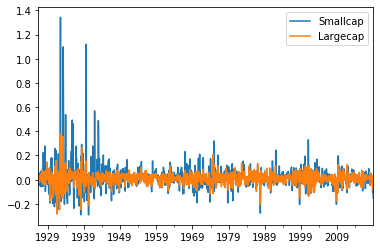

In [29]:
returns.index=pd.to_datetime(returns.index,format="%Y%m")
returns.plot.line()

Note: old versions of Python might have to use the command - %matplotlib inline

Volatility in the returns exhibited by the Small cap stocks in the period of time is much higher than the large cap stocks.
This is evident from the plot but let us try to see if the calculation on the same also adds up to what we said

In [22]:
returns.std()

Smallcap    0.106288
Largecap    0.053900
dtype: float64

Clearly above the Standard deviation of largecaps are considerably less than that of smallcaps.
Lets try to bring out the Annualized Volatility by converting the above from monthly data

In [23]:
Annualized_vol= returns.std()*np.sqrt(12)
Annualized_vol

Smallcap    0.368193
Largecap    0.186716
dtype: float64

Annualizing returns - To do that we will compute returns per month

In [24]:
num_mon= returns.shape[0]
Ret_per_mon=(1+returns).prod()**(1/num_mon)-1
Ret_per_mon

Smallcap    0.012986
Largecap    0.007423
dtype: float64

In [26]:
annualized_ret=((Ret_per_mon+1)**12)-1
annualized_ret

Smallcap    0.167463
Largecap    0.092810
dtype: float64

#### Return Risk Ratio & Sharpe Ratio

In [27]:
annualized_ret/Annualized_vol

Smallcap    0.454825
Largecap    0.497063
dtype: float64

Lets introduce a risk free rate of 3%

In [28]:
riskfree_rate=0.03
excess_return= annualized_ret-riskfree_rate
Sharpe_ratio = excess_return/Annualized_vol
Sharpe_ratio

Smallcap    0.373346
Largecap    0.336392
dtype: float64

Smallcaps show a better Return vs Risk performance over the period compared to large caps

### Conclusion

We have imported a real Data dump which was the US Equity market data between 1926 till 2018 consisting of many portfolios segregated on market capitalisation. We have then succesfully calculated the Return, Variance and Volatility of two portfolio series in it and then have gone on to compute the Annualized return to Risk ratio and finally the Sharpe ratio